# 1: Frame the problem and look at the big picture

## The task
Our task in this assignment is to use housing data from California to train a Machine Learning model which attempts to predict the median house value of a district given various data about the district, such as the median income of the district, the location, population etc. 

## The plan
In order to achieve this we first need to explore and familiarize ourselves with the data, then use our observations to prepare the data so that it can be interpreted by our models. This can involve filling in holes in the data, modifying the data in various ways such as changing its scale, deriving new information from the data by combining existing data in interesting ways, and so on. Finally we will create pipelines to prepare the data automatically and test multiple ML models to see which is the best fit for our task.

First we import some libraries we know we're going to use:

In [1]:
#imports
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

# 2: Get the data

This step is simple enough. We have downloaded the data and placed it in our project folder, now all we have to do is load it into memory and we're good to go. 

In [2]:
housing = pd.read_csv('data/housing_data.csv')
final_test = pd.read_csv('data/housing_test_data.csv')
sampleSubmission = pd.read_csv('data/sample_submission.csv')

These are, in order: the primary data we will be working with, the test set we will be using to validate our model at the end of the project, and an example submission showing how our final submission should look.

# 3: Explore the data

Now it's time to dive in. The easiest way to get some idea of what the data looks like is to simply look at some of it. 

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


Here we can see the various features of our data and learn some important information. We see that we have a total_rooms and a total_bedrooms feature which represents the total number of rooms and bedrooms in a district, which on their own seem somewhat useless. Perhaps we can combine these features with other features such as the number of households in order to get an idea of the average number of rooms per house in a district?

Looking into it further, we see that median_income seems to already be scaled for us, and we know that the number represents income in thousands of dollars per year. We also see that the ocean_proximity feature is a string, which is problematic for the models we expect to use, so this will need to be transformed somehow.

The Pandas info() function can help us gain more insight about the data.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Here we can see that the set contains 16512 entries, but not all columns are full. The total_bedrooms column is missing in a small number of districts. Given how insignificant the number seems, we may get away with simply removing the incomplete entries, but we would also need to do that for new data which means our model wouldn't work unless the new data also had that feature. Another way to deal with it could be to simply remove the column, but this could be sacrificing a lot of valuable information. It may be best to use an imputer to simply fill in values for the missing data.

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     7346
INLAND        5214
NEAR OCEAN    2112
NEAR BAY      1835
ISLAND           5
Name: ocean_proximity, dtype: int64

Looking closer at the ocean_proximity feature reveals that there are five different categories, perhaps we could simply convert these to numerical categories, or explore more sophisticated approaches.

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


Here we can see a lot of statistical information about the data. We can see that the maximum value for the median_income and median_house_value features seem suspiciously round, and we know that this is because those values are capped at an income of \\$150,000 and a median house value of \\$500,000. It may be beneficial to create categories for these features.

Another way to explore the data is to use various types of charts 

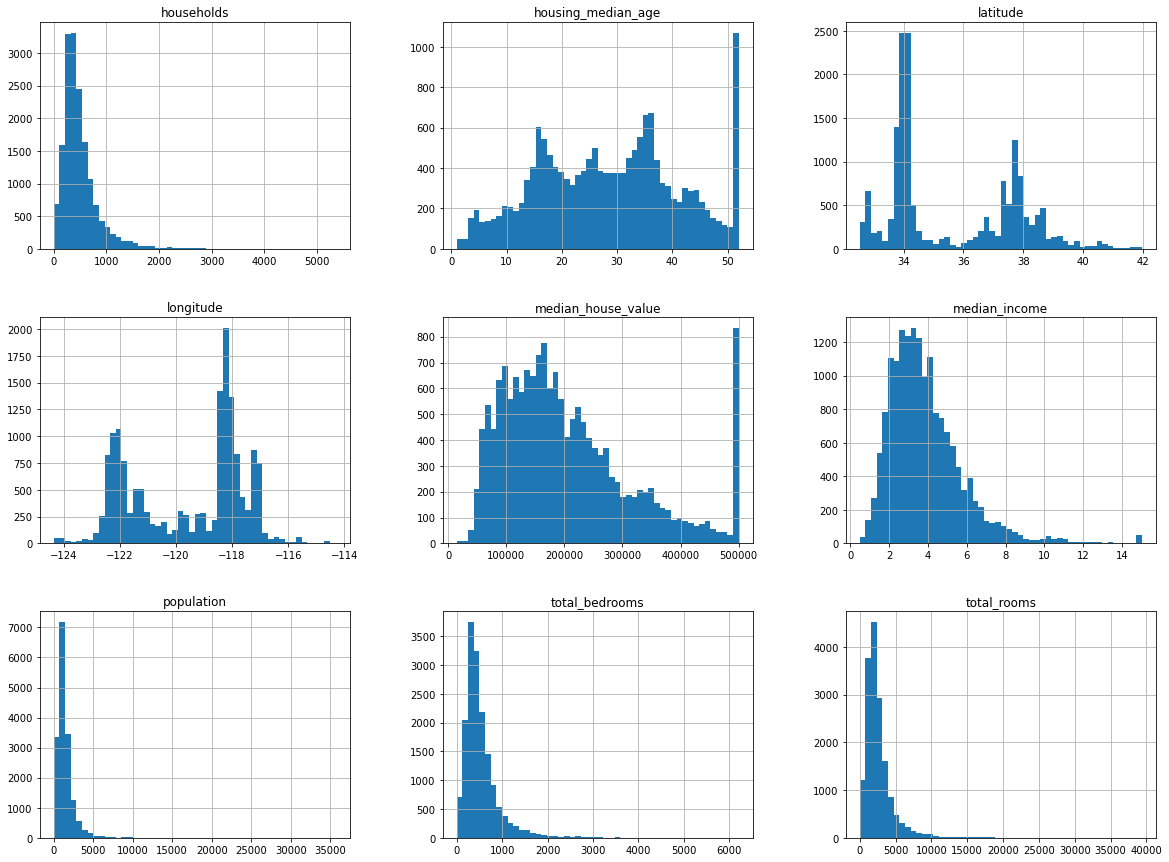

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

plt.show()

Here we can get a feel for the distributions of the different features. We can also see that cap on median house value affects quite a lot of districts, that the cap on median income does not affet a lot of districts, and that there also appears to be a cap on the median age feature, which we didn't notice earlier. 

## Split the data
Before going further, we split the data into a training set and a test set. This is done to allow us to test our model on data we haven't trained it on, as testing on the same data used to train is pointless.

In [8]:
# to make this notebook's output identical at every run
np.random.seed(42)

We split the median_income feature into categories and use the StratifiedShuffleSplit class to stratify the training and test sets based on the median income of a district, this ensures that both sets get a somewhat even distribution of features. If we simply used random selection we could end up with a training or test set with few or none of certain income brackets, which would be less than ideal. 

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

#for set_ in (strat_train_set, strat_test_set):
 #   set_.drop("income_cat", axis=1, inplace=True)

In [10]:
housing = housing.drop(['income_cat'], axis=1)

## Exploring the data a bit further
Now that we have separated our training data from our test data, we can continue exploring the data. It is important to not explore the test data as doing so could introduce subconscious bias, causing us to make mistakes such as overfitting. 

We copy the training set, allowing us to make experimetal changes without altering the original data.

In [11]:
housing = strat_train_set.copy()

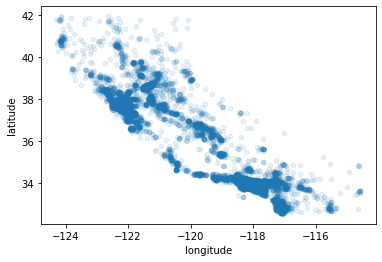

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Here we can see that the entries seem to be concentrated in certain areas, primarily San Francisco and Los Angeles. 

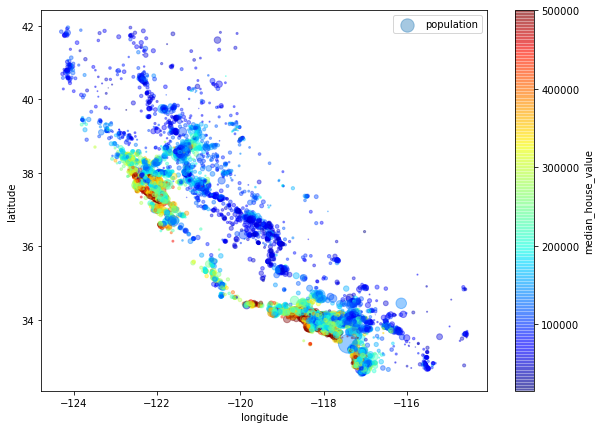

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

Plotting the location and using median_house_value to color the entries shows that the value appears to increase in the cities.

Another way to explore the data is to create a correlation matrix. This will reveal whether any of the features show correlation with the median house value, however it only shows linear correlations which means features which appear to be unrelated may just be non-linearly correlated. For example you can see that latitude and longitude do not appear to correlate with housing value, whereas it seems like they certainly are when looking at the heatmap above. This is because the correlation is not linear.

In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685704
total_rooms           0.133077
housing_median_age    0.106092
households            0.063955
total_bedrooms        0.047995
population           -0.026638
longitude            -0.041681
latitude             -0.149024
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027450C2A070>,
      dtype=object)

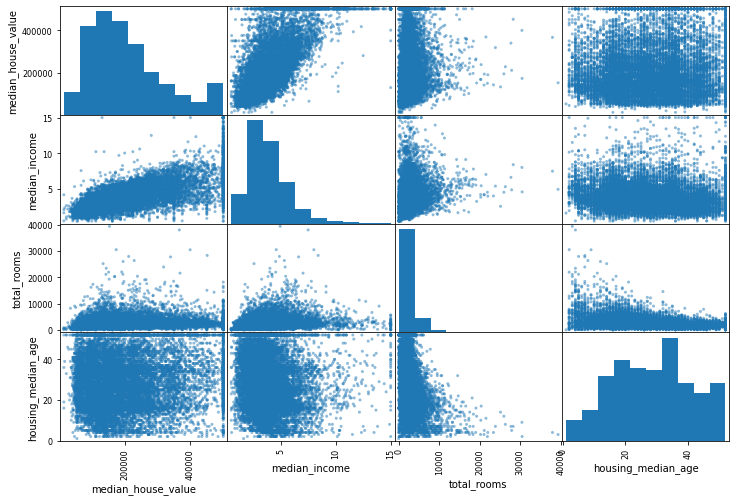

In [16]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

We can tell that there certainly seems to be a correlation between the median income and the median house value.

As mentioned earlier, we can derive some new information from the data in order to potentially gain new insights. Here we create three new features: rooms per household, bedrooms per household, bedrooms per room and population per household 

In [17]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [18]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685704
rooms_per_household         0.193628
total_rooms                 0.133077
housing_median_age          0.106092
households                  0.063955
total_bedrooms              0.047995
population_per_household   -0.025622
population                 -0.026638
longitude                  -0.041681
bedrooms_per_household     -0.070610
latitude                   -0.149024
bedrooms_per_room          -0.255611
Name: median_house_value, dtype: float64

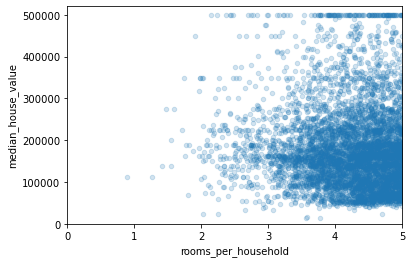

In [19]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

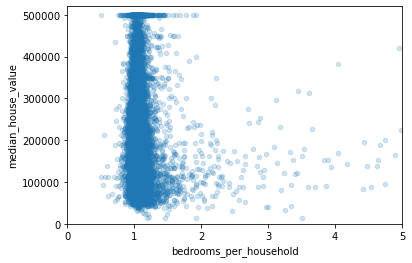

In [20]:
housing.plot(kind="scatter", x="bedrooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

We can see that rooms per household seems to correlate linearly with median house value, whereas bedrooms per household does not seem very useful as the vast majority of districts average a single bedroom per household. 

In [21]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household
count,13209.000000,13209.000000,13209.000000,13209.000000,13083.000000,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000,13083.000000,13083.000000,13209.000000
mean,-119.563785,35.619523,28.704141,2636.232493,537.885347,1428.444318,500.317511,3.873968,207606.217579,5.393556,1.089033,0.213094,3.100253
std,1.997009,2.131178,12.542755,2189.868049,421.182686,1132.388993,383.258223,1.909787,116027.578521,1.901080,0.324553,0.058043,12.181447
min,-124.300000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.500000,0.100000,0.692308
25%,-121.790000,33.930000,18.000000,1442.000000,294.000000,787.000000,279.000000,2.570100,120300.000000,4.440909,1.005316,0.175105,2.432727
50%,-118.490000,34.250000,29.000000,2116.000000,433.000000,1163.000000,409.000000,3.528800,180500.000000,5.227778,1.048837,0.203221,2.825480
75%,-118.010000,37.700000,37.000000,3140.000000,646.000000,1728.000000,603.000000,4.746300,265500.000000,6.057576,1.098592,0.239916,3.285347
max,-114.560000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,59.875000,15.312500,1.000000,1243.333333


# 4: Prepare the data

Now that we've learned some valuable information about the data we're working with, it's time to prepare the data so that our machine learning algorithms can make good use of it. 
First, we separate the training set into the actual training data and the labels. 

In [22]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

In [23]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
11433,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,4
16207,-119.69,36.83,32.0,1098.0,NaN,726.0,224.0,1.4913,INLAND,1
5506,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,INLAND,3
7062,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,NEAR BAY,2
4672,-122.22,38.08,37.0,2811.0,NaN,1574.0,516.0,3.1053,NEAR BAY,3


Now it's time to deal with our incomplete entries. As noted earlier, some entries are missing the total_bedrooms field. Some ways to deal with this could be to simply remove the incomplete entries, remove the feature from all entries, or impute the value by simply setting it to the median value. In any case, it seems useful to have a feature indicating whether the value was present or not, so let's do that first.

In [24]:
housing["missing_bedrooms"] = housing["total_bedrooms"].isna()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,missing_bedrooms
12502,-118.15,34.12,52.0,1518.0,344.0,725.0,296.0,3.4018,<1H OCEAN,3,False
3675,-117.88,34.12,34.0,912.0,165.0,522.0,150.0,4.0417,<1H OCEAN,3,False
8033,-121.09,37.33,40.0,524.0,112.0,329.0,96.0,1.7188,INLAND,2,False
10494,-118.24,33.99,41.0,1425.0,372.0,1803.0,353.0,1.6731,<1H OCEAN,2,False
1457,-122.40,37.72,37.0,971.0,248.0,647.0,208.0,2.1187,NEAR BAY,2,False


Now, for estimating the bedrooms feature we can see from the description above that the number of bedrooms per district ranges from one to over six thousand. The median can be calculated with 

In [25]:
housing["total_bedrooms"].median()

433.0

and given our earlier observation that the vast majority of district have an average of slightly above 1 bedroom per household, it seems naive to just set it to 433 wherever it's missing. It seems we can derive a far more accurate estimate by simply setting the number of bedrooms to equal the number of households, possibly a little more. We can see above that 50% of households have below 1.048 bedrooms per household, so maybe 1.048 is a good estimate. We will test this against the more naive imputer approach to see which appears to perform better. 

In [26]:
housing_beds_est = housing.copy()
mask = housing_beds_est["missing_bedrooms"]
housing_beds_est.loc[mask, "total_bedrooms"] = housing_beds_est.loc[mask, "households"] * 1.048

Now we should have a dataframe where all the missing bedrooms have been filled in with slightly more than the number of households in that district. Let's test that assumption just to make sure we didn't mess something up.

In [27]:
housing.loc[housing["total_bedrooms"].isna()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,missing_bedrooms
11433,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,4,True
16207,-119.69,36.83,32.0,1098.0,NaN,726.0,224.0,1.4913,INLAND,1,True
5506,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,INLAND,3,True
7062,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,NEAR BAY,2,True
4672,-122.22,38.08,37.0,2811.0,NaN,1574.0,516.0,3.1053,NEAR BAY,3,True


In [28]:
housing_beds_est.loc[mask].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,missing_bedrooms
11433,-117.87,33.83,27.0,2287.0,367.848,1140.0,351.0,5.6163,<1H OCEAN,4,True
16207,-119.69,36.83,32.0,1098.0,234.752,726.0,224.0,1.4913,INLAND,1,True
5506,-117.65,34.04,15.0,3393.0,640.328,2039.0,611.0,3.9336,INLAND,3,True
7062,-122.17,37.75,38.0,992.0,271.432,732.0,259.0,1.6196,NEAR BAY,2,True
4672,-122.22,38.08,37.0,2811.0,540.768,1574.0,516.0,3.1053,NEAR BAY,3,True


In [29]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,missing_bedrooms
12502,-118.15,34.12,52.0,1518.0,344.0,725.0,296.0,3.4018,<1H OCEAN,3,False
3675,-117.88,34.12,34.0,912.0,165.0,522.0,150.0,4.0417,<1H OCEAN,3,False
8033,-121.09,37.33,40.0,524.0,112.0,329.0,96.0,1.7188,INLAND,2,False
10494,-118.24,33.99,41.0,1425.0,372.0,1803.0,353.0,1.6731,<1H OCEAN,2,False
1457,-122.40,37.72,37.0,971.0,248.0,647.0,208.0,2.1187,NEAR BAY,2,False


In [30]:
housing_beds_est.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,missing_bedrooms
12502,-118.15,34.12,52.0,1518.0,344.0,725.0,296.0,3.4018,<1H OCEAN,3,False
3675,-117.88,34.12,34.0,912.0,165.0,522.0,150.0,4.0417,<1H OCEAN,3,False
8033,-121.09,37.33,40.0,524.0,112.0,329.0,96.0,1.7188,INLAND,2,False
10494,-118.24,33.99,41.0,1425.0,372.0,1803.0,353.0,1.6731,<1H OCEAN,2,False
1457,-122.40,37.72,37.0,971.0,248.0,647.0,208.0,2.1187,NEAR BAY,2,False


Looks like everything is in order!

Now that we have estimated the missing bedrooms feature and added a feature indicating whether the feature has been estimated, we will create another dataset using SimpleImputer where we simply replace the missing values with the median value. If the estimate turns out to work well, we can create a final pipeline where we use both strategies, so that any other missing fields get imputed using the simple approach. 

## Pipelines

In order to automate the process, it is best to create pipelines so that all the steps are easily repeatable and easily modifiable. We will start this process now. We use the CombinedAttributesAdder as suggested in the book and create our own estimator for dealing with the missing bedrooms.

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [32]:
class BedroomFixer(BaseEstimator, TransformerMixin):
    #def __init__(self):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X["missing_bedrooms"] = X["total_bedrooms"].isna()
        mask = X["missing_bedrooms"]
        X.loc[mask, "total_bedrooms"] = X.loc[mask, "households"] * 1.048
        return np.c_[X]

Here we define our first pipeline, which will deal with the missing bedrooms, impute any values still missing, add the combined attributes like rooms per household etc, and scale all the values to be within similar ranges. 

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor

num_pipeline = Pipeline([
        ('bedroomFixer', BedroomFixer()),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
       
        #('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(housing.drop("ocean_proximity", axis=1))),
        ("cat", OneHotEncoder(), ['ocean_proximity']),
    ])

full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("randomForest", RandomForestRegressor(n_estimators=100, random_state=42))
    ])

housing_labels = strat_train_set["median_house_value"].copy()

housing

full_pipeline_with_predictor.fit(housing,housing_labels)

housing.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12502    -118.15     34.12                52.0       1518.0           344.0   
3675     -117.88     34.12                34.0        912.0           165.0   
8033     -121.09     37.33                40.0        524.0           112.0   
10494    -118.24     33.99                41.0       1425.0           372.0   
1457     -122.40     37.72                37.0        971.0           248.0   
...          ...       ...                 ...          ...             ...   
9487     -117.06     34.02                24.0       3912.0           809.0   
10397    -122.71     38.43                52.0       1439.0           325.0   
2947     -117.85     33.77                16.0       2186.0           511.0   
3818     -118.15     34.13                50.0       2443.0           494.0   
3590     -121.92     37.31                13.0       6035.0          1551.0   

       population  ho

In [34]:
print(housing.head)
print(final_test.head)

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12502    -118.15     34.12                52.0       1518.0           344.0   
3675     -117.88     34.12                34.0        912.0           165.0   
8033     -121.09     37.33                40.0        524.0           112.0   
10494    -118.24     33.99                41.0       1425.0           372.0   
1457     -122.40     37.72                37.0        971.0           248.0   
...          ...       ...                 ...          ...             ...   
9487     -117.06     34.02                24.0       3912.0           809.0   
10397    -122.71     38.43                52.0       1439.0           325.0   
2947     -117.85     33.77                16.0       2186.0           511.0   
3818     -118.15     34.13                50.0       2443.0           494.0   
3590     -121.92     37.31                13.0       6035.0          1551.0   

       population  ho

In [35]:
final_test_pred = full_pipeline_with_predictor.predict(final_test)

ValueError: Number of features of the input must be equal to or greater than that of the fitted transformer. Transformer n_features is 11 and input n_features is 10.

# TODO:
## Finish preparing the data
## Create pipeline
## Test multiple algorithms


###Testing current pipeline


In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", num_pipeline),
        ("randomForest", RandomForestClassifier(random_state=42, n_estimators=1000) #,max_depth=10,min_samples_split=3,n_jobs=1))
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
median_house_value = full_pipeline_with_predictor.predict(final_test)
submission = pd.DataFrame({'Id': final_test['Id'], 'median_house_value': median_house_value})

In [ ]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [ ]:
sample_incomplete_rows

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(housing_num)

In [ ]:
imputer.statistics_

Check that this is the same as manually computing the median of each attribute:

In [ ]:
housing_num.median().values

Transform the training set:

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [ ]:
housing_tr.loc[sample_incomplete_rows.index.values]

In [ ]:
imputer.strategy

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [ ]:
housing_tr.head()

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

In [ ]:
ordinal_encoder.categories_

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [ ]:
housing_cat_1hot.toarray()

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
cat_encoder.categories_

Let's create a custom transformer to add extra attributes:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

Now let's build a pipeline for preprocessing the numerical attributes:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

In [ ]:
housing_prepared.shape

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [ ]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [ ]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [ ]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

The result is the same as with the `ColumnTransformer`:

In [ ]:
np.allclose(housing_prepared, old_housing_prepared)

# Select and train a model 

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Compare against the actual values:

In [ ]:
print("Labels:", list(some_labels))

In [ ]:
some_data_prepared

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# Fine-tune your model

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

We could compute the interval manually like this:

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

Alternatively, we could use a z-scores rather than t-scores:

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

# Extra material

## A full pipeline with both preparation and prediction

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
median_house_value = full_pipeline_with_predictor.predict(final_test)
submission = pd.DataFrame({'Id': final_test['Id'], 'median_house_value': median_house_value})

In [ ]:
submission.head()

In [ ]:
# Stores a csv file to submit to the kaggle competition
submission.to_csv('submission.csv', index=False)

## Model persistence using joblib

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Example SciPy distributions for `RandomizedSearchCV`

In [ ]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# Exercise solutions

## 1.

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [ ]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

That's much worse than the `RandomForestRegressor`. Let's check the best hyperparameters found:

In [ ]:
grid_search.best_params_

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

Now this is much closer to the performance of the `RandomForestRegressor` (but not quite there yet). Let's check the best hyperparameters found:

In [ ]:
rnd_search.best_params_

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Let's look at the exponential distribution we used, with `scale=1.0`. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

In [ ]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

In [ ]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

## 3.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a `RandomForestRegressor`). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

Let's define the number of top features we want to keep:

In [ ]:
k = 5

Now let's look for the indices of the top k features:

In [ ]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

In [ ]:
np.array(attributes)[top_k_feature_indices]

Let's double check that these are indeed the top k features:

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

Looking good... Now let's create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [ ]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Let's look at the features of the first 3 instances:

In [ ]:
housing_prepared_top_k_features[0:3]

Now let's double check that these are indeed the top k features:

In [ ]:
housing_prepared[0:3, top_k_feature_indices]

Works great!  :)

## 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [ ]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Let's try the full pipeline on a few instances:

In [ ]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best `RandomForestRegressor` that we found earlier, rather than the best `SVR`.

## 5.

Question: Automatically explore some preparation options using `GridSearchCV`.

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

In [ ]:
grid_search_prep.best_params_

The best imputer strategy is `most_frequent` and apparently almost all features are useful (15 out of 16). The last one (`ISLAND`) seems to just add some noise.

Congratulations! You already know quite a lot about Machine Learning. :)